# BayesDB analysis of fish bouts in relation to paramecia characteristics

## 1. Ingesting the data

### a. Launching BayesDB

In [1]:
%load_ext jupyter_probcomp.magics

session_id: jovyan@nightcrawler2-notebook_2018-06-15T21:23:36.277969_4


In [2]:
%matplotlib inline
%vizgpm inline

<IPython.core.display.Javascript object>

In [3]:
%bayesdb -j 042318_6/bdb_hunts_inverted.bdb

u'Loaded: 042318_6/bdb_hunts_inverted.bdb'

### b. Loading and printing the data from a `.csv` file

In [4]:
%sql DROP TABLE IF EXISTS bout_table;
%bql CREATE TABLE bout_table FROM '042318_6/huntbouts_inverted.csv' 

""


## 3. Characterizing dependencies among variables

### a. Exploring dependencies identified by BayesDB's CrossCat

In [5]:
%%bql
DROP TABLE IF EXISTS "dependence_probabilities";
CREATE TABLE "dependence_probabilities" AS
    ESTIMATE DEPENDENCE PROBABILITY
    FROM PAIRWISE VARIABLES OF bout_population;

""


In [6]:
%bql .interactive_heatmap SELECT * FROM "dependence_probabilities"

<IPython.core.display.Javascript object>

### b. Comparing the CrossCat results with linear correlation

In [7]:
%%bql
DROP TABLE IF EXISTS "correlation_coefficients";
CREATE TABLE "correlation_coefficients" AS
    ESTIMATE CORRELATION
    FROM PAIRWISE VARIABLES OF bout_population;

""


In [8]:
%bql .interactive_heatmap SELECT * FROM "correlation_coefficients"

<IPython.core.display.Javascript object>

## 4. Visualizing dependencies among variables

In [9]:
%%bql
DROP TABLE IF EXISTS "temp";
CREATE TABLE "temp" AS 
    SIMULATE "Bout Az", "Bout Alt", "Bout Dist", "Bout Delta Yaw", "Bout Delta Pitch", "Para Az", "Para Az Velocity", "Para Alt", "Para Alt Velocity", "Para Dist", "Para Dist Velocity"
    FROM bout_population
--    USING MODEL 2
    LIMIT 5000;  

""


In [34]:
df = %bql SELECT "Bout Az", "Bout Delta Yaw" FROM "temp" WHERE "Para Az Velocity" > 0 AND "Para Az" BETWEEN 0 AND 1
df.describe()

,Bout Az,Bout Delta Yaw
count,1721.000000,1721.000000
mean,0.290855,0.078364
std,1.078506,0.482531
min,-13.774106,-17.321987
25%,0.004024,-0.008637
50%,0.230402,0.056912
75%,0.504190,0.158007
max,23.114726,4.789659


In [39]:
df = %bql SELECT "Bout Az", "Bout Delta Yaw" FROM bout_table WHERE "Para Az Velocity" < 0 AND "Para Az" BETWEEN 0 AND 1
df.describe()

,Bout Az,Bout Delta Yaw
count,19.000000,19.000000
mean,0.251629,0.065278
std,0.359405,0.099413
min,-0.427386,-0.137395
25%,0.075789,0.025995
50%,0.204258,0.055453
75%,0.307163,0.072368
max,1.386589,0.379399


In [45]:
%%bql 
.interactive_pairplot --population=bout_population
SELECT "Bout Az", "Bout Delta Yaw"
FROM bout_table WHERE "Para Az Velocity" > 0 AND "Para Az" > 0 AND "Para Az" < .5


<IPython.core.display.Javascript object>

In [46]:
%%bql 
.interactive_pairplot --population=bout_population
SELECT "Bout Az","Bout Delta Yaw"
FROM bout_table WHERE "Para Az Velocity" < 0 AND "Para Az" > 0 AND "Para Az" < .5

<IPython.core.display.Javascript object>

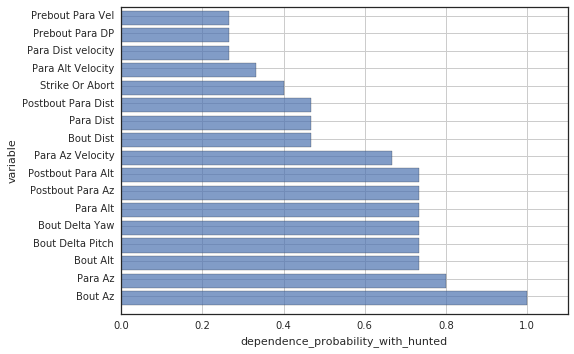

In [37]:
%%sql 
.barh 
SELECT
    name0 AS variable, 
    value AS dependence_probability_with_hunted 
    FROM dependence_probabilities 
    WHERE name1 = "Bout Az" 
    ORDER BY value DESC
    LIMIT 20;

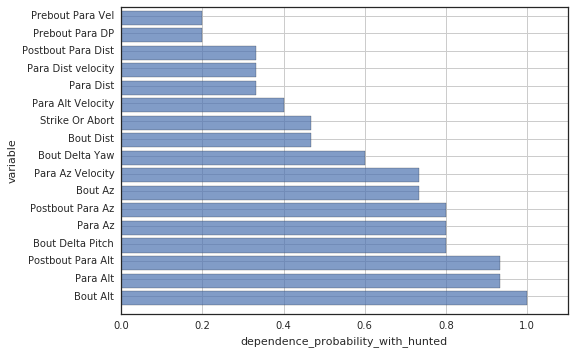

In [38]:
%%sql 
.barh 
SELECT
    name0 AS variable, 
    value AS dependence_probability_with_hunted 
    FROM dependence_probabilities 
    WHERE name1 = "Bout Alt"
    ORDER BY value DESC
    LIMIT 20;

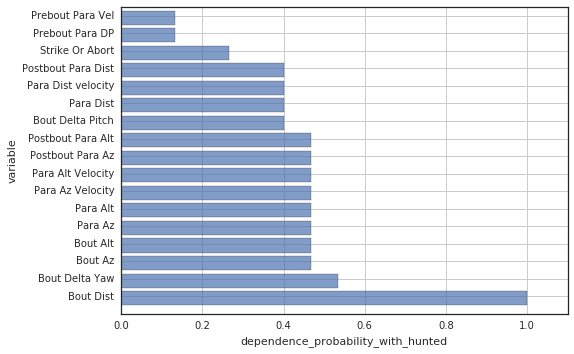

In [39]:
%%sql 
.barh 
SELECT
    name0 AS variable, 
    value AS dependence_probability_with_hunted 
    FROM dependence_probabilities 
    WHERE name1 = "Bout Dist" 
    ORDER BY value DESC
    LIMIT 20;

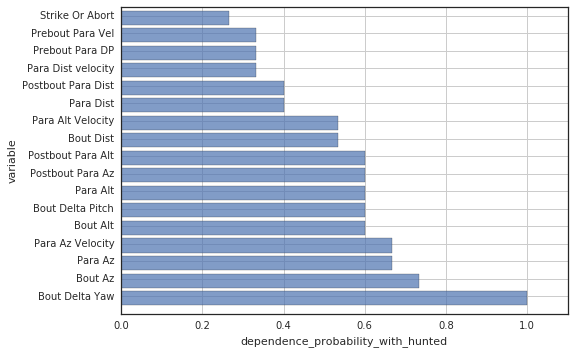

In [40]:
%%sql 
.barh 
SELECT
    name0 AS variable, 
    value AS dependence_probability_with_hunted 
    FROM dependence_probabilities 
    WHERE name1 = "Bout Delta Yaw" 
    ORDER BY value DESC
    LIMIT 20;

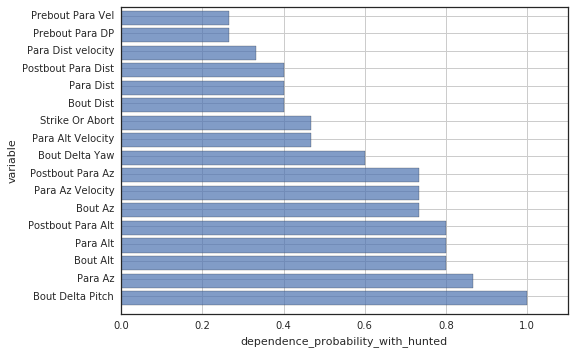

In [41]:
%%sql 
.barh 
SELECT
    name0 AS variable, 
    value AS dependence_probability_with_hunted 
    FROM dependence_probabilities 
    WHERE name1 = "Bout Delta Pitch" 
    ORDER BY value DESC
    LIMIT 20;

In [42]:
%%bql
.interactive_pairplot --population=bout_population 
SELECT
    "Bout Az",
    "Bout Alt" 
FROM bout_table
WHERE "Strike Or Abort" < 2;

<IPython.core.display.Javascript object>

In [43]:
import numpy as np
p_az = np.float32(np.random.randn())
p_alt = np.random.randn()
p_dist = np.random.randn() * 10
print(p_az)

-0.169629


In [44]:
%%bql
.interactive_pairplot --population=bout_population 
--SIMULATE "Bout Az", "Bout Alt", "Bout Dist", "Bout Delta Yaw", "Bout Delta Pitch"
SIMULATE "Bout Az"
FROM bout_population
--GIVEN "Para Az" = .5, "Para Az Velocity" = .01, "Para Alt" = .2, "Para Alt Velocity" = -.01,
--    "Para Dist"= 10, "Para Dist Velocity" = -1, "Prebout Para DP" = .7 
GIVEN "Para Az" = 1
LIMIT 5000;

<IPython.core.display.Javascript object>

In [45]:
df = %bql SIMULATE "Bout Az", "Bout Alt", "Bout Dist", "Bout Delta Yaw", "Bout Delta Pitch" FROM bout_population GIVEN "Para Az" = .5, "Para Az Velocity" = .01, "Para Alt" = .2, "Para Alt Velocity" = -.01,"Para Dist"= 10, "Para Dist Velocity" = -1, "Prebout Para DP" = .7 LIMIT 5000;
data = df.var(axis=0).as_matrix()
print data
#title = 'Variance of:   SIMULATE <eeg> FROM eeg_population GIVEN age_in_months=6 LIMIT 1000'
#colorbar_label = 'variance of normalized power'

#eeg_plot_data(df, data, title, colorbar_label)


[  8.26099009e-01   3.71794139e-01   1.12683691e+03   8.68022465e-02
   7.34102001e-02]


In [46]:
print df.median(axis=0)

Bout Az              0.093338
Bout Alt            -0.044213
Bout Dist           45.902901
Bout Delta Yaw      -0.008774
Bout Delta Pitch     0.027919
dtype: float64


In [47]:
%%bql
.interactive_pairplot --population=bout_population 
SELECT
    "Strike Or Abort",
    "Prebout Para DP",
    "Prebout Para Vel"
FROM bout_table;

<IPython.core.display.Javascript object>

In [48]:
%%bql
.interactive_pairplot --population=bout_population 
SELECT
    "Strike Or Abort",
    "Prebout Para DP",
    "Prebout Para Vel"
FROM bout_table;

<IPython.core.display.Javascript object>

In [49]:
%%bql
.interactive_pairplot --population=bout_population 
SIMULATE
    "Strike Or Abort",
    "Prebout Para DP",
    "Prebout Para Vel"
FROM bout_population
LIMIT 350;

<IPython.core.display.Javascript object>

## Computing and plotting similarity with respect to a variable of interest

In [50]:
%%bql 
--DROP TABLE IF EXISTS "similarity_context_alt_coord";

--CREATE TABLE "similarity_context_alt_coord" AS
--    ESTIMATE SIMILARITY
--        IN THE CONTEXT OF "Para Az"
--    FROM PAIRWISE "bout_population";

ValueError: no BQL phrase in string

In [ ]:
%%bql
--.interactive_heatmap  --table=bout_table 
--SELECT * FROM "similarity_context_alt_coord"